# COMANDO DA QUESTÃO C
Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

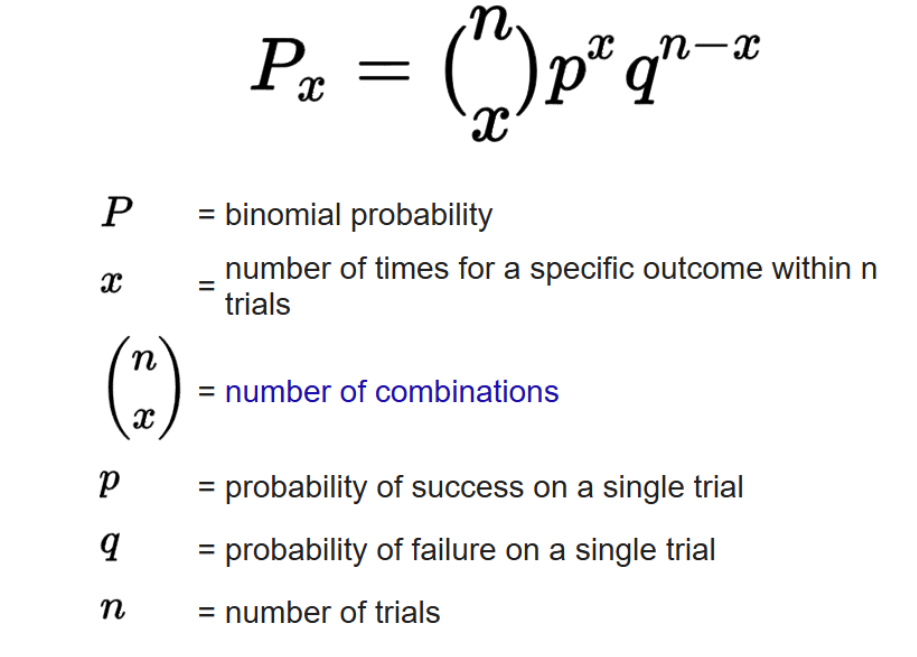

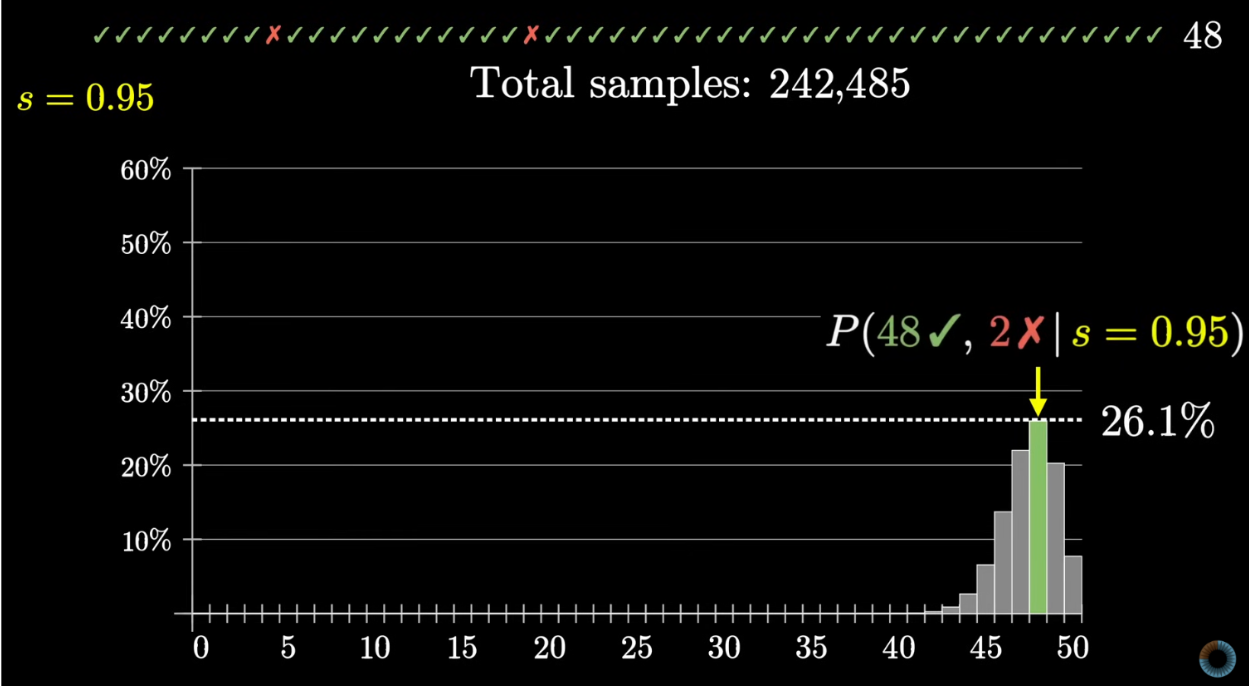

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from matplotlib.figure import Figure

# Parâmetros
n = 50  # número de tentativas
s = 0.80  # probabilidade de sucesso
num_amostras = 242485  # mesmo valor do exemplo

# Calcular a probabilidade exata usando a fórmula
def probabilidade_binomial(n, x, p):
    # P_x = (n escolhe x) * p^x * (1-p)^(n-x)
    from scipy.special import comb
    return comb(n, x) * (p**x) * ((1-p)**(n-x))

# Calcular a probabilidade para 48 sucessos em 50 tentativas
prob_exata = probabilidade_binomial(n, 48, s)
print(f"Probabilidade exata P(48 sucessos | s=0.80) = {prob_exata:.6f} = {prob_exata*100:.2f}%")

# Simular o experimento binomial
sucessos = np.random.binomial(n, s, num_amostras)

# Calcular a proporção de amostras com 48 sucessos
prob_simulada = np.mean(sucessos == 48)
print(f"Probabilidade simulada P(48 sucessos | s=0.80) = {prob_simulada:.6f} = {prob_simulada*100:.2f}%")

# Criar histograma para todas as amostras
plt.figure(figsize=(10, 6))
bins = np.arange(n+2) - 0.5
plt.hist(sucessos, bins=bins, density=True, alpha=0.7)
plt.axvline(x=48, color='r', linestyle='--')
plt.title(f'Distribuição de Sucessos em {num_amostras} Amostras (s={s})')
plt.xlabel('Número de Sucessos')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.savefig("distribuicao_completa.png")

# Histogramas para as primeiras 10 amostras
fig, eixos = plt.subplots(5, 2, figsize=(15, 20))
eixos = eixos.flatten()

for i in range(10):
    # Gerar uma nova amostra para cada histograma
    sucessos_amostra = np.random.binomial(n, s, 1000)
    
    eixos[i].hist(sucessos_amostra, bins=bins, density=True, alpha=0.7)
    eixos[i].axvline(x=48, color='r', linestyle='--')
    eixos[i].set_title(f'Amostra {i+1}: 1000 Tentativas (s={s})')
    eixos[i].set_xlabel('Número de Sucessos')
    eixos[i].set_ylabel('Frequência')
    eixos[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("distribuicoes_amostrais.png")

# Comparar com outros valores de s
valores_s = [0.80, 0.85, 0.90, 0.95]
plt.figure(figsize=(12, 8))

for s_val in valores_s:
    # Calcular a PMF para este valor de s
    x = np.arange(n+1)
    pmf = binom.pmf(x, n, s_val)
    
    plt.plot(x, pmf, '-o', markersize=4, label=f's = {s_val}')
    
    # Destacar P(48)
    plt.plot(48, binom.pmf(48, n, s_val), 'o', markersize=8)
    
plt.axvline(x=48, color='gray', linestyle='--', alpha=0.5)
plt.title('PMF Binomial para Diferentes Probabilidades de Sucesso')
plt.xlabel('Número de Sucessos')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("comparacao.png")

# Calcular a probabilidade exata para 48 sucessos e 2 falhas
sucessos_necessarios = 48
falhas_necessarias = n - sucessos_necessarios
prob_exata_com_falhas = probabilidade_binomial(n, sucessos_necessarios, s)
print(f"P({sucessos_necessarios} ✓, {falhas_necessarias} ✗ | s={s}) = {prob_exata_com_falhas:.6f} = {prob_exata_com_falhas*100:.2f}%")

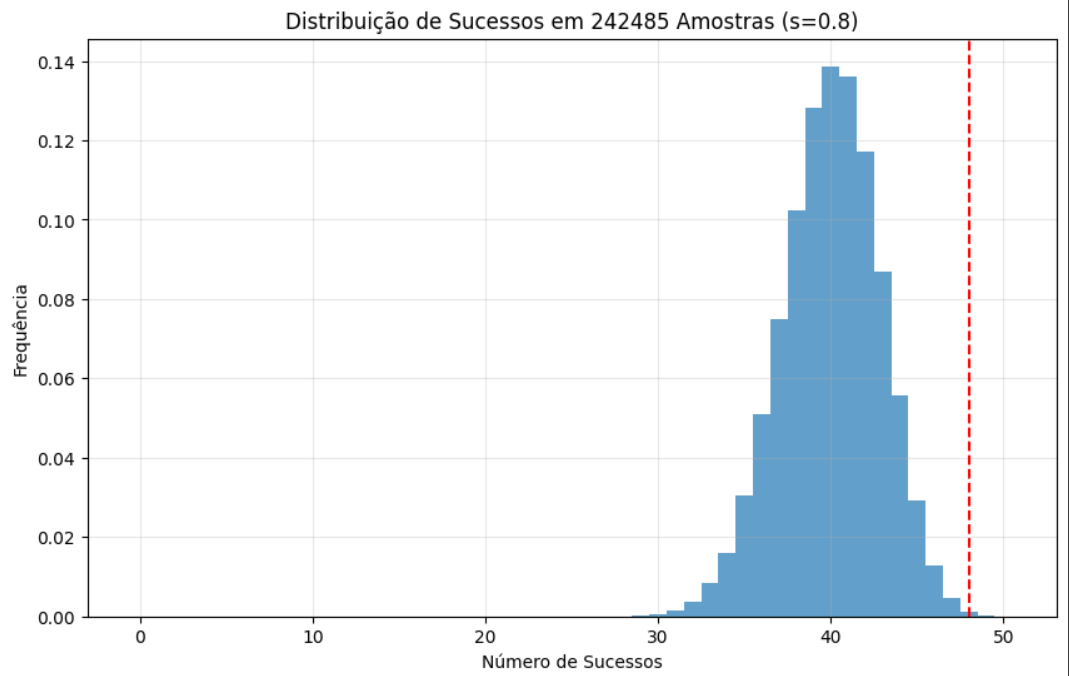

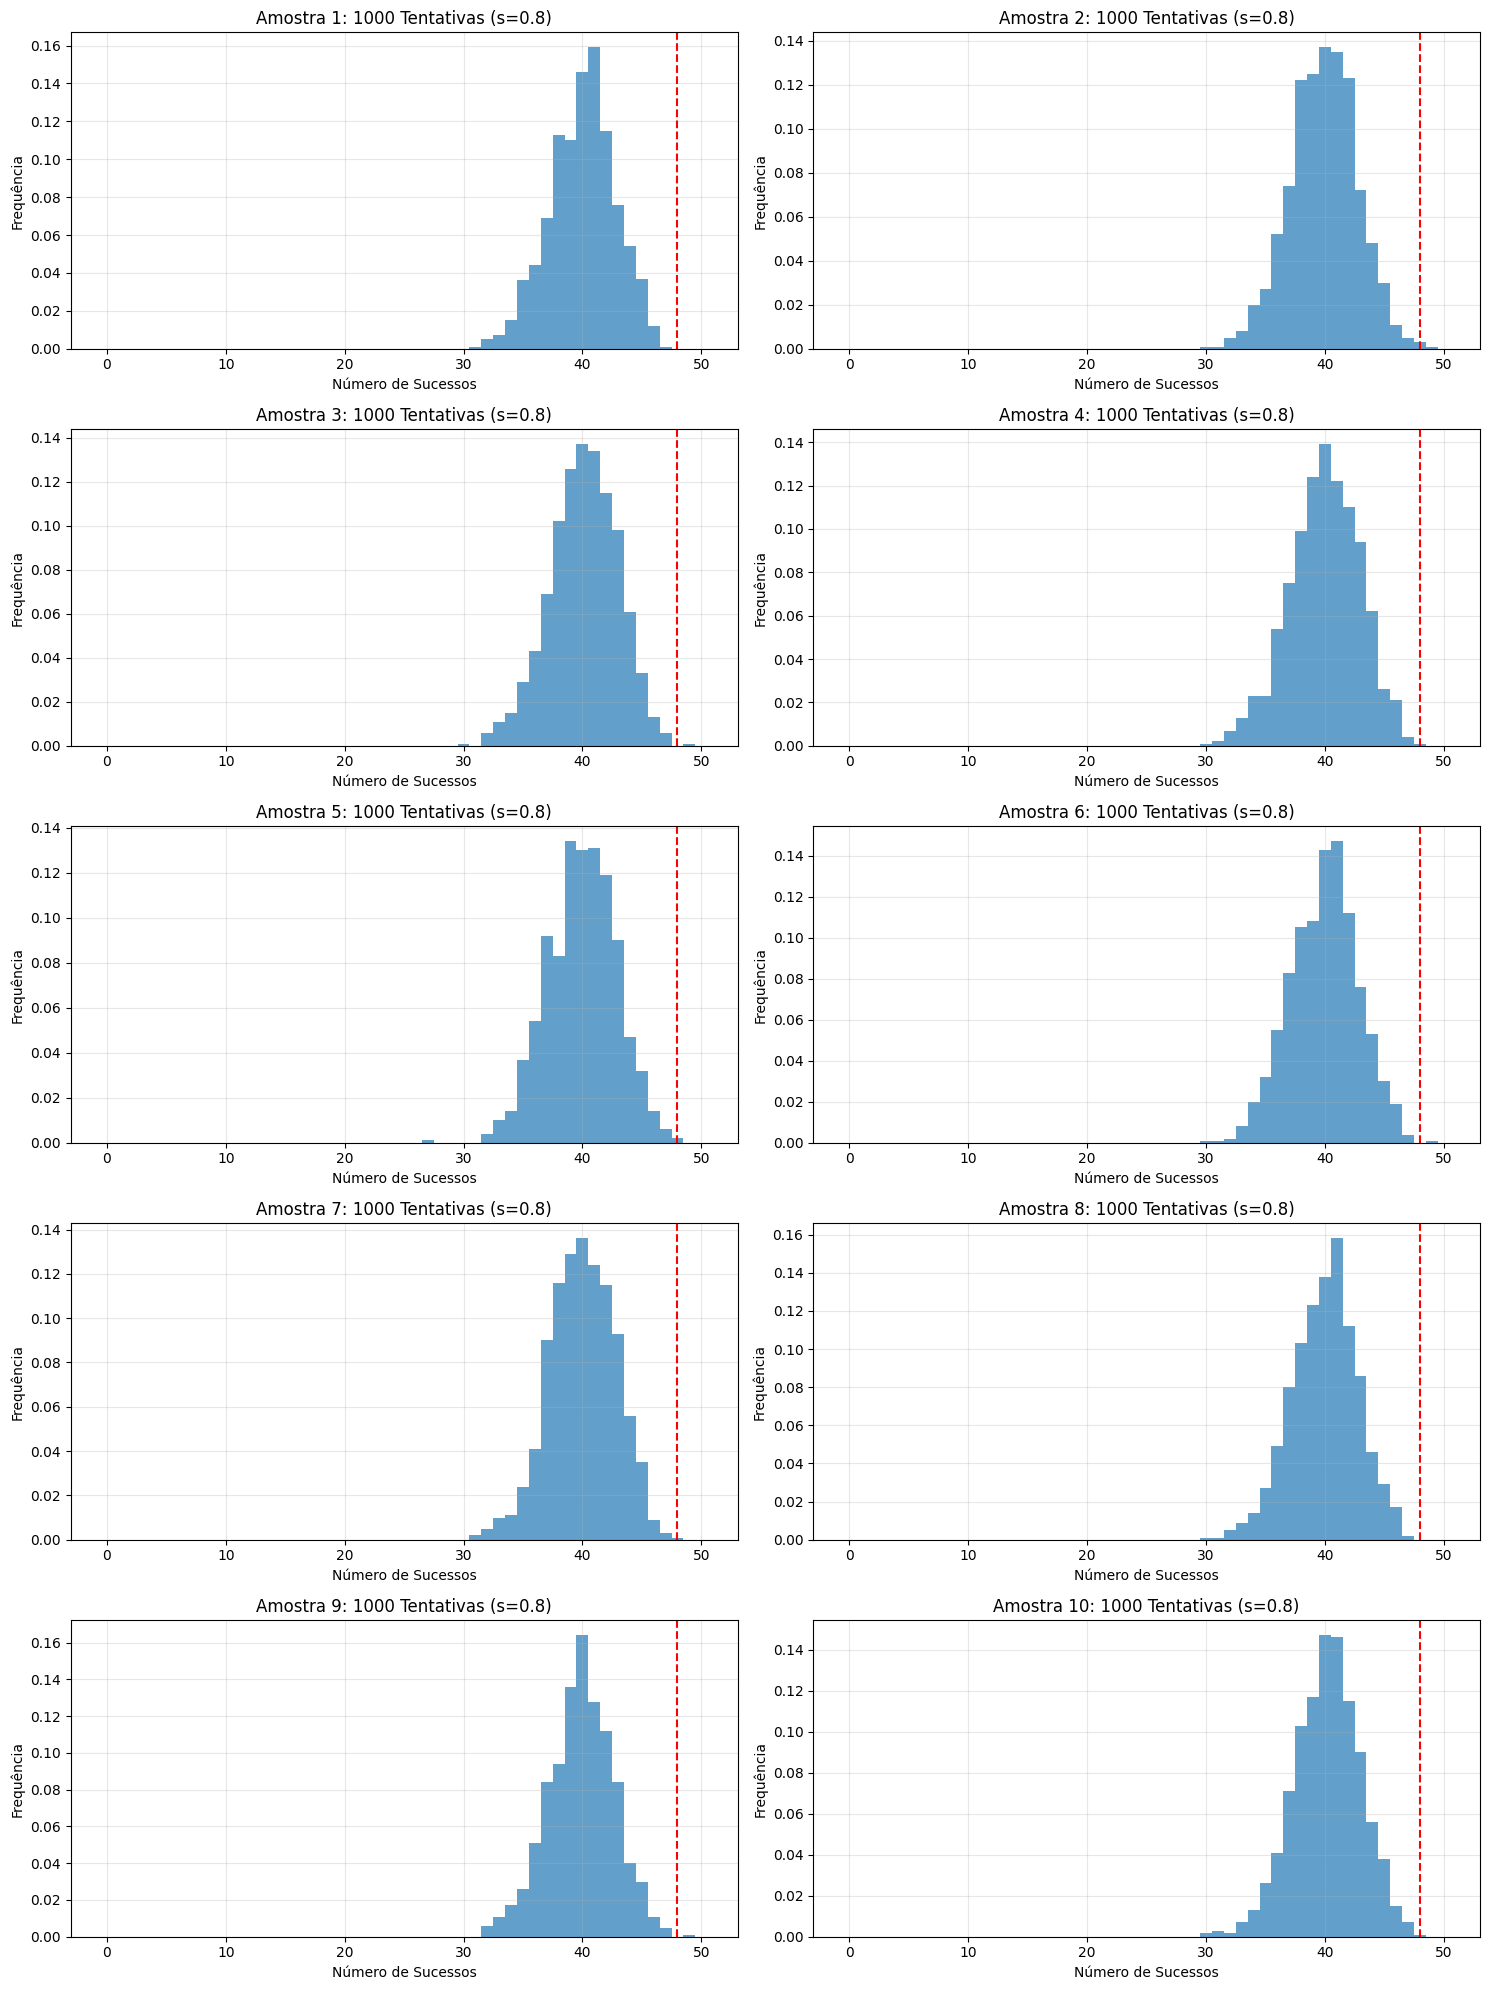

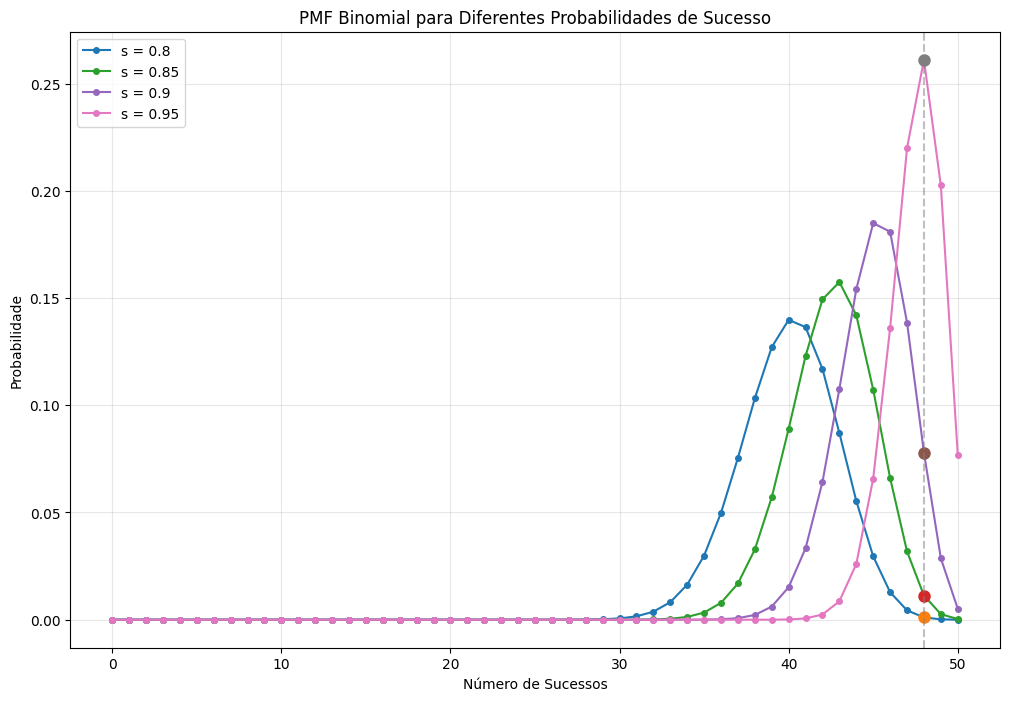

n = 50, x = 48, p = 0,80:

(50 escolhem 48) = 1.225

0,80 ^ 48 ≈ 0,00004066

0,20 ^ 2 = 0,04

P(48) = 1,225 × 0,00004066 × 0,04 ≈ 0,001991

A probabilidade exata de obter exatamente 48 sucessos de 50 tentativas com uma probabilidade de sucesso de 0,80 é de aproximadamente 0,1991%